Repeated point: 145.0 232.0
Repeated point: 59.0 243.0
Repeated point: 171.0 50.0
Repeated point: 8.0 135.0
Repeated point: 109.0 61.0
Repeated point: 25.0 105.0
Repeated point: 155.0 203.0
Repeated point: 93.0 46.0
Repeated point: 32.0 252.0
Repeated point: 136.0 117.0


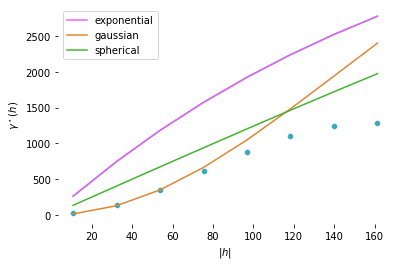

In [3]:
import csv
import math
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def distance(point1, point2):
	return math.sqrt((point2[0]-point1[0])*(point2[0]-point1[0])+(point2[1]-point1[1])*(point2[1]-point1[1]))

# Parse input
points_list = []
with open('samples.xyz') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  header = next(reader)
  for line in reader:
    p = list(map(float, line))
    points_list.append(p)

# Remove duplicate points
clean_points_list = []
for point1 in points_list:
	repeated = False
	for point2 in clean_points_list:
		if point1[0] == point2[0] and point1[1] == point2[1]:
			repeated = True
	if repeated == False:
		clean_points_list.append(point1)
	else:
		print("Repeated point: " + str(point1[0]) + " " + str(point1[1]))
points = np.array(clean_points_list)

# Plot dataset
# plt.figure(1)
# dataplot = sns.scatterplot(x=points[:,0], y=points[:,1], hue=points[:,2])
# sns.despine(left=True,bottom=True)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# Variogram cloud
variogram_points_list = []
max_distance = 0.0
use_probability = 1.0
for point1 in points:
	for point2 in points:
		if random.random() >= use_probability:
			continue
		h = distance(point1, point2)
		if h > max_distance:
			max_distance = h
		variogram_points_list.append([h, 0.5*(point2[2]-point1[2])*(point2[2]-point1[2])])
variogram_points = np.array(variogram_points_list)

# Experimental variogram
experimental_variogram_bins = []
experimental_variogram_count = []
experimental_variogram_sum = []
bins = 8
half_distance = max_distance/2.0
for i in range(bins):
	experimental_variogram_bins.append(half_distance*(i+0.5)/bins)
	experimental_variogram_sum.append(0.0)
	experimental_variogram_count.append(0)

for point in variogram_points:
	correct_bin = math.floor(bins*point[0]/half_distance)
	if correct_bin < bins:
		experimental_variogram_sum[correct_bin] += point[1]
		experimental_variogram_count[correct_bin] += 1

experimental_variogram_average = []
for i in range(bins):
	if experimental_variogram_count[i] > 0.0:
		experimental_variogram_average.append(experimental_variogram_sum[i]/experimental_variogram_count[i])
	else:
		experimental_variogram_average.append(0.0)

theoretical_variogram_exponential = []
theoretical_variogram_gaussian = []
theoretical_variogram_spherical = []
exponential_style = []
gaussian_style = []
spherical_style = []
sill_exponential = 5000
sill_gaussian = 5000
sill_spherical = 5000
range_exponential = 600
range_gaussian = 400
range_spherical = 600
nugget_exponential = 3
nugget_gaussian = 4
nugget_spherical = 3
for bin in experimental_variogram_bins:
	theoretical_variogram_exponential.append(nugget_exponential+sill_exponential*(1.0 - math.exp(-3.0*bin/range_exponential)))
	theoretical_variogram_gaussian.append(nugget_gaussian+sill_gaussian*(1.0 - math.exp(-9.0*bin*bin/(range_gaussian*range_gaussian))))
	exponential_style.append('exponential')
	gaussian_style.append('gaussian')
	spherical_style.append('spherical')
	if bin <= range_spherical:
		theoretical_variogram_spherical.append(nugget_spherical+sill_spherical*(((3.0*bin)/(2.0*range_spherical))-((bin*bin*bin)/(2.0*range_spherical*range_spherical*range_spherical))))
	else:
		theoretical_variogram_spherical.append(nugget_spherical+sill_spherical)

plt.figure(3)
sns.set_palette(sns.husl_palette(4, h=0.6))
sns.scatterplot(x=experimental_variogram_bins, y=experimental_variogram_average)
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_exponential)
sns.set_palette(sns.husl_palette(4, h=0.85))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_exponential, hue=exponential_style)
sns.set_palette(sns.husl_palette(4, h=0.1))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_gaussian, hue=gaussian_style)
sns.set_palette(sns.husl_palette(4, h=0.35))
sns.lineplot(x=experimental_variogram_bins, y=theoretical_variogram_spherical, hue=spherical_style)
sns.despine(left=True,bottom=True)
plt.xlabel('$|h|$')
plt.ylabel('$\gamma^\star(h)$')
plt.show()
